In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df=pd.read_csv("medical_examination.csv")
df

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
plt.plot(df['height'])

In [ ]:
df['age']=df['age']/(365)
df

In [ ]:
df['overweight']=((df['weight']*10000)/(df['height']**2) > 25)*1
df

In [ ]:
df['overweight'].sum()

In [ ]:
df.head()

In [ ]:
df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["cholesterol"] > 1, "cholesterol"] = 1
df

In [ ]:
df.loc[df["gluc"] == 1, "gluc"] = 0
df.loc[df["gluc"] > 1, "gluc"] = 1
df


In [ ]:

df_cat=pd.melt(df,id_vars=['cardio'],value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])
# df_cat=df_cat.groupby()
df_cat['total']=np.zeros(len(df_cat['variable']))
df_cat=pd.DataFrame(df_cat.groupby(["cardio","variable","value"])['total'].count()).reset_index()
df_cat
sns.catplot(x="variable",y='total',kind='bar',data=df_cat,hue="value",col='cardio')
# df_cat.head()

In [ ]:
df

In [291]:
df_heat = df[(df['ap_lo']<=df['ap_hi'])&(df['height']>=df['height'].quantile(0.025))&(df['height']<=df['height'].quantile(0.975))&(df['weight']>=df['weight'].quantile(0.025))&(df['weight']<=df['weight'].quantile(0.975))]

In [292]:
corr=df_heat.corr()
corr    

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


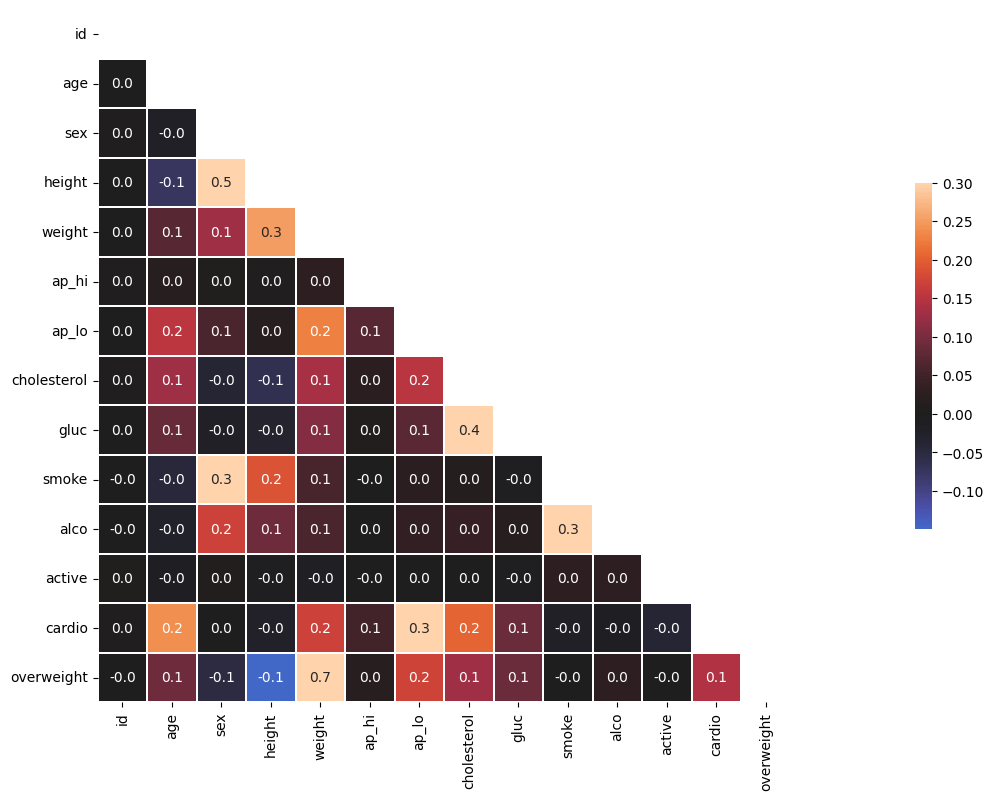

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

In [312]:
mask=np.triu(corr)
mask.shape
# corr.shape
fig,ax=plt.subplots(figsize=(32,9))
fig=sns.heatmap(corr,ax=ax,center=0,cbar_kws={"shrink": .5},mask=mask,linewidths=0.01,square=True,fmt='.1f',annot=True,vmax = .30)
sns.heatmap?